## NOTE: 
**Question 1-3 will be solved based on an assumption first for now, and the problem with labeling will be solved separatedly. Also, it would be a good idea to gather the problems with data along the way**

# Question 2:
* Which problems can be solved quickly but have not been solved?
* Can you pinpoint the reason why? 
* Note: Only for Bangkok

Interpreting which 'problems' as which 'types' of problems can be solved quickly but have not been solved, let's take a look at the cases of each type.

# Import Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast

# Functions

In [12]:
import numpy as np
def makeList(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

# the_df.type = the_df.type.apply(makelist)
# the_df = the_df.explode('type')

In [13]:
import numpy as np
def makeList2(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split('/')
    else: return np.nan

In [14]:
import numpy as np
def makeList3(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split('-')
    else: return np.nan

In [15]:
import numpy as np
def stripSpace(x):
    if isinstance(x,str):
        return x.strip()
    else: return np.nan

# Consider by Types

### Exploding types

In [67]:
# combined_df = pd.read_csv('Combined_Cases_And_Logs.csv')
combined_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Bangkok.csv')

In [68]:
# combined_df['province'].value_counts()
combined_df_bkk['province'].value_counts()

province
กรุงเทพมหานคร    624020
Name: count, dtype: int64

In [69]:
# combined_df['province'].value_counts().reset_index().to_csv("combined_df['province'].value_counts().reset_index().csv", index=False)

In [70]:
# combined_df.shape
combined_df_bkk.shape

(624020, 17)

In [71]:
# combined_df.head()
combined_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00


In [72]:
# combined_df['type'].value_counts()
combined_df_bkk['type'].value_counts()

type
อื่นๆ                                             115756
ทางเท้า                                            93539
ผิดกฎจราจร                                         40009
จุดเสี่ยง,ความปลอดภัย                              34433
ถนน,ผิดกฎจราจร                                     29823
                                                   ...  
อื่นๆ,น้ำท่วม,คนเร่ร่อน                                1
ควันดำ,แท็กซี่/รถเมล์                                  1
ถนน ทางเท้า ที่จอดรถ,ทางเท้า,อาคารสถานที่ชำรุด         1
อื่นๆ,ควันดำ,สายสื่อสาร,ฝุ่นควัน&กลิ่น&PM2.5           1
ถนน,ความสะอาด,จุดเสี่ยง,ความปลอดภัย                    1
Name: count, Length: 982, dtype: int64

In [73]:
# combined_df[combined_df['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']
combined_df_bkk[combined_df_bkk['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"อื่นๆ,น้ำท่วม,คนเร่ร่อน","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [74]:
combined_df_bkk[combined_df_bkk['type'].isnull()]

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration


In [76]:
# combined_exploded_df = combined_df.copy()
combined_exploded_df_bkk = combined_df_bkk.copy()

In [77]:
# combined_exploded_df['type'] = combined_exploded_df['type'].apply(makeList)
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList)

In [78]:
# combined_exploded_df['type'].value_counts()
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]                                               115756
[ทางเท้า]                                              93539
[ผิดกฎจราจร]                                           40009
[จุดเสี่ยง, ความปลอดภัย]                               34433
[ถนน, ผิดกฎจราจร]                                      29823
                                                       ...  
[อื่นๆ, น้ำท่วม, คนเร่ร่อน]                                1
[ควันดำ, แท็กซี่/รถเมล์]                                   1
[ถนน ทางเท้า ที่จอดรถ, ทางเท้า, อาคารสถานที่ชำรุด]         1
[อื่นๆ, ควันดำ, สายสื่อสาร, ฝุ่นควัน&กลิ่น&PM2.5]          1
[ถนน, ความสะอาด, จุดเสี่ยง, ความปลอดภัย]                   1
Name: count, Length: 982, dtype: int64

In [79]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"[อื่นๆ, น้ำท่วม, คนเร่ร่อน]","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


Many people tag 'อื่นๆ' with other types of problem, which shouldn't be done. So the 'อื่นๆ' will be removed if tagged with other types.

In [80]:
combined_exploded_df_bkk.loc[:,'type'] = combined_exploded_df_bkk.loc[:,'type'].apply(lambda x: list(x))

In [81]:
def removeOthers(x):
    if 'อื่นๆ' in x and len(x) > 1:
        x.remove('อื่นๆ')
        return x
    else:
        return x

In [82]:
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(removeOthers)

In [83]:
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]                             115756
[ทางเท้า]                            96188
[ผิดกฎจราจร]                         42124
[ไฟฟ้า]                              40241
[จุดเสี่ยง, ความปลอดภัย]             34506
                                     ...  
[ไฟฟ้า, เผาในที่โล่ง]                    1
[เสียง, แท็กซี่/รถเมล์]                  1
[หาบเร่แผงลอย, เบาะแสยาเสพติด]           1
[ต้นไม้, ภัยอื่นๆ]                       1
[บริจาค/ช่วยเหลือ, อุปกรณ์ชำรุด]         1
Name: count, Length: 742, dtype: int64

In [84]:
# combined_exploded_df = combined_exploded_df.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

In [85]:
# combined_exploded_df.shape
combined_exploded_df_bkk.shape

(809461, 17)

In [86]:
combined_exploded_df_bkk[combined_exploded_df_bkk['type'].isnull()]

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration


makeList2 and makeList3 are added later due to some problems with 'type' not being all exploded.

In [89]:
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList2) 
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList3) 
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

In [90]:
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                              115756
ผิดกฎจราจร                         102147
ทางเท้า                            100369
ความปลอดภัย                         70976
ถนน                                 59482
                                    ...  
อาคาร                                   1
ห้องน้ำคนพิการ                          1
ทางลาด                                  1
Public Event ขออนุญาตจัดกิจกรรม         1
แสงสว่าง                                1
Name: count, Length: 77, dtype: int64

In [91]:
# combined_exploded_df.head()
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
0,2024-ANZFC6,รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


In [92]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,น้ำท่วม,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00
286899,2023-NUPL4X,คนเร่ร่อน,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [93]:
combined_exploded_df_bkk[combined_exploded_df_bkk['type'].isnull()]

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration


In [94]:
# combined_exploded_df.to_csv('Combined_Cases_And_Logs_Exploded.csv', index=False)
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv', index=False)

### Categorizing types

Have to properly map and categorize types here first to prevent problems with findinf averages.

In [95]:
combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv')

In [96]:
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ANZFC6,รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


In [97]:
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                              115756
ผิดกฎจราจร                         102147
ทางเท้า                            100369
ความปลอดภัย                         70976
ถนน                                 59482
                                    ...  
อาคาร                                   1
ห้องน้ำคนพิการ                          1
ทางลาด                                  1
Public Event ขออนุญาตจัดกิจกรรม         1
แสงสว่าง                                1
Name: count, Length: 77, dtype: int64

In [98]:
combined_exploded_df_bkk['type'].nunique()

77

In [99]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ ', ' ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ & บัตรทอง', 'ถนน ทางเท้า ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ

In [100]:
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(stripSpace)

In [101]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ', 'ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ & บัตรทอง', 'ถนน ทางเท้า ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ',

In [102]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ถนน ทางเท้า ที่จอดรถ', 'type'] = 'ถนน&ทางเท้า&ที่จอดรถ'

In [103]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == '> ไฟดับ', 'type'] = 'ไฟดับ'

In [104]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'สุขภาพ & บัตรทอง', 'type'] = 'สุขภาพ&บัตรทอง'

In [105]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ', 'ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ&บัตรทอง', 'ถนน&ทางเท้า&ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ',
 

In [874]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประปา'])

In [106]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'น้ำท่วม', 'type'] = 'อุทกภัย&การประปา'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ประปา', 'type'] = 'อุทกภัย&การประปา'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อุทกภัย', 'type'] = 'อุทกภัย&การประปา'

In [107]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทางลาด'])

In [108]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ผู้พิการ+ใช้ล้อ', 'type'] = 'ผู้พิการ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ห้องน้ำคนพิการ', 'type'] = 'ผู้พิการ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ทางลาด', 'type'] = 'ผู้พิการ'

In [109]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'type'] = 'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'Public Event ขออนุญาตจัดกิจกรรม', 'type'] = 'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'

In [110]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'แสงสว่าง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ไฟฟ้า'])

In [111]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'แสงสว่าง', 'type'] = 'ไฟฟ้า'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ไฟดับ', 'type'] = 'ไฟฟ้า'

In [112]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ที่จอดรถ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ถนน'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทางเท้า'])

In [113]:
import numpy as np
def fixParkingRoadPavement(x):
    if x == 'ถนน&ทางเท้า&ที่จอดรถ':
        return x.split('&')
    elif isinstance(x,str):
        return x.split()
    else:
        return np.nan

In [114]:
combined_exploded_df_bkk.loc[:,'type'] = combined_exploded_df_bkk['type'].apply(fixParkingRoadPavement)

In [115]:
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]           115756
[ผิดกฎจราจร]      102147
[ทางเท้า]         100371
[ความปลอดภัย]      70976
[ถนน]              59484
                   ...  
[อาคารถล่ม]            1
[ทรุด]                 1
[ภัยแล้ง]              1
[อาคารสถานที่]         1
[ดินโคลนถล่ม]          1
Name: count, Length: 68, dtype: int64

In [116]:
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

In [117]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อาคารสถานที่']['comment'].values)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อาคาร'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทรุด'])

In [118]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคารสถานที่ชำรุด', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคาร', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคารถล่ม', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ทรุด', 'type'] = 'อาคารสถานที่'

In [119]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ไฟป่า', 'type'] = 'อัคคีภัย'

In [120]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ควันไฟ'])

In [121]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ฝุ่นละออง', 'type'] = 'ฝุ่นควัน&กลิ่น&PM2.5'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ควันไฟ', 'type'] = 'ฝุ่นควัน&กลิ่น&PM2.5'

In [122]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'เบาะแสยาเสพติด', 'type'] = 'ยาเสพติด'

In [123]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'สถานบันเทิง']['comment'].values[7])

In [124]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประปาหัวแดง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ถังดับเพลิง'])

In [125]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ประปาหัวแดง', 'type'] = 'ประปาหัวแดง&ถังดับเพลิง'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ถังดับเพลิง', 'type'] = 'ประปาหัวแดง&ถังดับเพลิง'

In [126]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขยะ'].head())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'เผาในที่โล่ง'].head())
# Not the same

In [127]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วัสดุชำรุด'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อุปกรณ์ชำรุด'])

In [128]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วัสดุชำรุด', 'type'] = 'อุปกรณ์&วัสดุชำรุด'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อุปกรณ์ชำรุด', 'type'] = 'อุปกรณ์&วัสดุชำรุด'

In [129]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ผิดกฎจราจร'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'แท็กซี่'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'รถเมล์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วินมอไซค์'])

In [130]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'แท็กซี่', 'type'] = 'ผิดกฎจราจร'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'รถเมล์', 'type'] = 'ผิดกฎจราจร'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วินมอไซค์', 'type'] = 'ผิดกฎจราจร'

In [131]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ป้ายโฆษณา'])

In [132]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ']['comment'].values[-3])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ']['comment'].values[11])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ'].shape)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ'].shape)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'เสนอแนะ']['comment'].values[11])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประชาสัมพันธ์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ช่วยเหลือ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ด้านบริการ'])

In [133]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'เสนอแนะ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ประชาสัมพันธ์', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ช่วยเหลือ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ด้านบริการ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'

In [134]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'จุดเสี่ยง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ความปลอดภัย'])
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'จุดเสี่ยง', 'type'] = 'จุดเสี่ยง&ความปลอดภัย'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ความปลอดภัย', 'type'] = 'จุดเสี่ยง&ความปลอดภัย'

In [135]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทุจริต']['comment'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'กรุงเทพโปร่งใส']['comment'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทุจริต']['duration'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'กรุงเทพโปร่งใส']['duration'].value_counts())
# The comment of these are all 'ไม่แสดงรายละเอียด', though they have different durations

In [136]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ชื่นชม'])

In [137]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'คุ้มครองผู้บริโภค'])

In [138]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยออนไลน์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยอื่นๆ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยจากการคมนาคมขนส่ง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยทางถนน'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยแล้ง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วาตภัย'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'จุดอันตราย'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยจากการก่อความไม่สงบ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ดินโคลนถล่ม'])

In [139]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อื่นๆ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'บริจาค'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ปัญหาสังคมอื่นๆ'])

In [140]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'บริจาค', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ปัญหาสังคมอื่นๆ', 'type'] = 'อื่นๆ'

In [141]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยออนไลน์', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยอื่นๆ', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยจากการคมนาคมขนส่ง', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยทางถนน', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยแล้ง', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วาตภัย', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'จุดอันตราย', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยจากการก่อความไม่สงบ', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ดินโคลนถล่ม', 'type'] = 'อื่นๆ'

In [142]:
combined_exploded_df_bkk['type'].unique()

array(['ผิดกฎจราจร', 'ความสะอาด', 'เสียง', 'หาบเร่แผงลอย',
       'อุทกภัย&การประปา', 'อื่นๆ', 'อุปกรณ์&วัสดุชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่', 'ป้ายโฆษณา',
       'ขอใช้บริการ&ขอความช่วยเหลือ', 'ไฟฟ้า', 'ทางเท้า',
       'ฝุ่นควัน&กลิ่น&PM2.5', 'สัตว์', 'ต้นไม้', 'สายสื่อสาร',
       'อุบัติเหตุ', 'จุดเสี่ยง&ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'ยาเสพติด', 'ทุจริต', 'กรุงเทพโปร่งใส',
       'โรงเรียน', 'ชื่นชม', 'คุ้มครองผู้บริโภค',
       'ประปาหัวแดง&ถังดับเพลิง', 'สถานบันเทิง', 'สุขภาพ&บัตรทอง',
       'ที่จอดรถ', 'ควันดำ', 'ผู้พิการ', 'อัคคีภัย',
       'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'], dtype=object)

In [912]:
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                                   115875
จุดเสี่ยง&ความปลอดภัย                   110972
ผิดกฎจราจร                               98654
ทางเท้า                                  97324
ถนน                                      54571
ความสะอาด                                49173
ต้นไม้                                   31835
อุทกภัย&การประปา                         27188
ขยะ                                      21726
ฝุ่นควัน&กลิ่น&PM2.5                     21694
เสียง                                    19515
ไฟฟ้า                                    17536
ขอใช้บริการ&ขอความช่วยเหลือ              15400
สัตว์                                     8083
อาคารสถานที่                              5477
อุปกรณ์&วัสดุชำรุด                        3732
หาบเร่แผงลอย                              3643
ทุจริต                                    3311
กรุงเทพโปร่งใส                            3299
คนเร่ร่อน                                 1433
สายสื่อสาร                                 881
เผาในที่

In [143]:
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv', index=False)

### Type: "others"

In [144]:
# combined_exploded_averages_df_bkk_categorized_exceed_plot = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Exceed_Plot.csv')
combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv')

In [145]:
combined_exploded_df_bkk.shape

(811369, 17)

In [146]:
# combined_exploded_averages_df_bkk_categorized_exceed_plot['type'].value_counts()
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                                   116003
จุดเสี่ยง&ความปลอดภัย                   113406
ผิดกฎจราจร                              105495
ทางเท้า                                 100544
ถนน                                      59657
ความสะอาด                                51171
ไฟฟ้า                                    44361
ต้นไม้                                   33463
อุทกภัย&การประปา                         29827
ฝุ่นควัน&กลิ่น&PM2.5                     26101
เสียง                                    23104
ขยะ                                      22006
ขอใช้บริการ&ขอความช่วยเหลือ              20619
อุปกรณ์&วัสดุชำรุด                       10200
สัตว์                                    10026
หาบเร่แผงลอย                              7423
กรุงเทพโปร่งใส                            7366
ทุจริต                                    7208
ป้ายโฆษณา                                 6016
อาคารสถานที่                              5852
คนเร่ร่อน                                 3773
สายสื่อส

It can be seen that type "อื่นๆ" makes up quite a large portion of all cases (even after fixing it at exploding types).

In [147]:
# combined_exploded_averages_df_bkk_categorized_exceed_plot[combined_exploded_averages_df_bkk_categorized_exceed_plot['type'] == 'อื่นๆ']['comment']
combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อื่นๆ']['comment']

7         ทางซ19/1มีการก่อสร้าง เวลารถวิ่งเข้าออกซอยมีเเ...
17        ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...
47                                                    ขอทาน
76            ต่างกรรม ต่างวาระ\nยังไม่ได้ดำเนินคดี ปี 2567
111       ไฟจราจรข้ามถนน แถวบริเวณหน้าวัดมะกอก รพ เด็ก ก...
                                ...                        
811350                                                จราจร
811351                                                จราจร
811352                      รถจอดขายทุเรียนในพื้นที่ห้ามจอด
811356    ปัญหารถติดหน้าห่างสรรพสินค้า central eastville...
811368    ในซอยไม่มีทางเท้า มีการสร้างสิ่งปลูกสร้างทับคูน้ำ
Name: comment, Length: 116003, dtype: object

However, it can be seen that in this type, there are a mix of other types.
<br> But after reading the comments of other types, it is evident that there is a problem with tagging.
<br> So, since 'others' cannot be further categorized yet, it's not going to be considered, and thus removed for the time being.

In [148]:
combined_exploded_df_bkk = combined_exploded_df_bkk[combined_exploded_df_bkk['type']!= 'อื่นๆ']

In [149]:
combined_exploded_df_bkk.shape

(695366, 17)

In [150]:
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv', index=False)

### Finding average duration by type

In [151]:
# combined_exploded_df = pd.read_csv('Combined_Cases_And_Logs_Exploded.csv')
# combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv')
combined_exploded_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv')

In [152]:
# combined_exploded_df.shape
# combined_exploded_df_bkk.shape
combined_exploded_df_bkk_categorized.shape

(695366, 17)

In [153]:
# combined_exploded_df.isnull().sum()
# combined_exploded_df_bkk.isnull().sum()
combined_exploded_df_bkk_categorized.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      0
address                     0
subdistrict                 0
district                    0
province                    0
state                       0
star                   408967
count_reopen                0
last_activity               0
view_count                  0
timestamp_reported          0
timestamp_finish            0
duration                    0
dtype: int64

In [154]:
# combined_exploded_df.head()
# combined_exploded_df_bkk.head()
combined_exploded_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


#### Creating duration_df

In [155]:
# combined_exploded_df['duration'] = pd.to_timedelta(combined_exploded_df['duration'])
# combined_exploded_df_bkk['duration'] = pd.to_timedelta(combined_exploded_df_bkk['duration'])
combined_exploded_df_bkk_categorized['duration'] = pd.to_timedelta(combined_exploded_df_bkk_categorized['duration'])

In [156]:
# combined_exploded_df['duration_int64'] = combined_exploded_df['duration'].astype(np.int64)
# combined_exploded_df_bkk['duration_int64'] = combined_exploded_df_bkk['duration'].astype(np.int64)
combined_exploded_df_bkk_categorized['duration_int64'] = combined_exploded_df_bkk_categorized['duration'].astype(np.int64)

In [157]:
# combined_exploded_df['duration_int64'].head()
# combined_exploded_df_bkk['duration_int64'].head()
combined_exploded_df_bkk_categorized['duration_int64'].head()

0    1800000000000
1    1800000000000
2    8520000000000
3    1140000000000
4    1560000000000
Name: duration_int64, dtype: int64

In [158]:
# combined_exploded_df.groupby('type')['duration_int64'].mean()
# combined_exploded_df_bkk.groupby('type')['duration_int64'].mean()
combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].mean()

type
กรุงเทพโปร่งใส                          5.751300e+15
ขยะ                                     1.626255e+15
ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์    1.279876e+15
ขอใช้บริการ&ขอความช่วยเหลือ             5.097094e+15
ขึ้นทะเบียน&สำรวจ                       2.767081e+15
คนเร่ร่อน                               1.317196e+15
ควันดำ                                  4.206329e+15
ความสะอาด                               1.348728e+15
คุ้มครองผู้บริโภค                       1.695158e+15
จุดเสี่ยง&ความปลอดภัย                   6.798756e+15
ชื่นชม                                  4.499096e+14
ต้นไม้                                  3.977522e+15
ถนน                                     4.755770e+15
ทางเท้า                                 4.060222e+15
ที่จอดรถ                                4.041512e+15
ทุจริต                                  5.644672e+15
ประปาหัวแดง&ถังดับเพลิง                 1.807222e+15
ป้ายโฆษณา                               7.815418e+14
ผิดกฎจราจร                              5

In [159]:
# duration_df = combined_exploded_df.groupby('type')['duration_int64'].mean().reset_index()
# duration_df_bkk = combined_exploded_df_bkk.groupby('type')['duration_int64'].mean().reset_index()
duration_df_bkk_categorized = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].mean().reset_index()

In [160]:
# duration_df.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)
# duration_df_bkk.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)
duration_df_bkk_categorized.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)

In [161]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64
0,กรุงเทพโปร่งใส,5.751300e+15
1,ขยะ,1.626255e+15
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15


In [162]:
# duration_df['duration_mean_int64'].astype('timedelta64[m]')
# duration_df_bkk['duration_mean_int64'].astype('timedelta64[m]')
duration_df_bkk_categorized['duration_mean_int64'].astype('timedelta64[m]')

0    3993958452122 days 08:44:00
1    1129343932715 days 07:41:00
2     888803030303 days 00:43:00
3    3539648635158 days 12:16:00
4    1921583992616 days 00:48:00
5     914719630709 days 10:14:00
6    2921061910377 days 08:36:00
7     936616895637 days 12:04:00
8    1177193333333 days 08:00:00
9    4721358495508 days 18:17:00
10    312437189054 days 17:26:00
11   2762168330195 days 12:57:00
12   3302617838225 days 04:30:00
13   2819598650010 days 14:37:00
14   2806605476190 days 11:25:00
15   3919911076812 days 19:13:00
16   1255015130353 days 19:37:00
17    542737332391 days 09:37:00
18   3798251656081 days 15:31:00
19   3850459915611 days 19:33:00
20   2137756019884 days 07:06:00
21   3702221915849 days 16:09:00
22   1523747580645 days 03:52:00
23   4049508881075 days 20:52:00
24   2638876364544 days 21:29:00
25   1585840608465 days 14:36:00
26    620851682832 days 15:17:00
27   2507468553459 days 02:52:00
28   3546559032524 days 11:50:00
29   1731586680412 days 14:26:00
30   11895

In [163]:
# duration_df['duration_mean_timedelta64[ns]'] = duration_df['duration_mean_int64'].astype('timedelta64[ns]')
# duration_df_bkk['duration_mean_timedelta64[ns]'] = duration_df_bkk['duration_mean_int64'].astype('timedelta64[ns]')
duration_df_bkk_categorized['duration_mean_timedelta64[ns]'] = duration_df_bkk_categorized['duration_mean_int64'].astype('timedelta64[ns]')

In [164]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088


In [165]:
# combined_exploded_df['duration_int64_logscale'] = combined_exploded_df['duration_int64'].apply(np.log)
# combined_exploded_df_bkk['duration_int64_logscale'] = combined_exploded_df_bkk['duration_int64'].apply(np.log)
combined_exploded_df_bkk_categorized['duration_int64_logscale'] = combined_exploded_df_bkk_categorized['duration_int64'].apply(np.log)

In [166]:
# combined_exploded_df.head()
# combined_exploded_df_bkk.head()
combined_exploded_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration,duration_int64,duration_int64_logscale
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00,1800000000000,28.218808
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00,1800000000000,28.218808
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00,8520000000000,29.773437
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00,1140000000000,27.762049
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00,1560000000000,28.075707


In [167]:
# temp_logscale_mean = combined_exploded_df.groupby('type')['duration_int64_logscale'].mean().reset_index()
# temp_logscale_mean = combined_exploded_df_bkk.groupby('type')['duration_int64_logscale'].mean().reset_index()
temp_logscale_mean = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64_logscale'].mean().reset_index()

In [168]:
temp_logscale_mean.rename(columns={'duration_int64_logscale':'duration_mean_int64_logscale'}, inplace=True)

In [169]:
temp_logscale_mean

,type,duration_mean_int64_logscale
0,กรุงเทพโปร่งใส,34.668155
1,ขยะ,33.193146
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,33.943274
3,ขอใช้บริการ&ขอความช่วยเหลือ,34.105964
4,ขึ้นทะเบียน&สำรวจ,33.755129
5,คนเร่ร่อน,33.147985
6,ควันดำ,34.430724
7,ความสะอาด,33.088456
8,คุ้มครองผู้บริโภค,34.045174
9,จุดเสี่ยง&ความปลอดภัย,34.644084


In [170]:
temp_logscale_mean['duration_mean_int64_logscale_expback'] = temp_logscale_mean['duration_mean_int64_logscale'].apply(np.exp)

In [171]:
# temp_logscale_mean['duration_mean_timedelta64[ns]_logscale'] = temp_logscale_mean['duration_mean_int64_logscale'].astype('timedelta64[ns]')
temp_logscale_mean['duration_mean_timedelta64[ns]_logscale_expback'] = temp_logscale_mean['duration_mean_int64_logscale_expback'].astype('timedelta64[ns]')

In [172]:
temp_logscale_mean

,type,duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback
0,กรุงเทพโปร่งใส,34.668155,1.138121e+15,13 days 04:08:40.878509701
1,ขยะ,33.193146,2.603756e+14,3 days 00:19:35.600019465
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,33.943274,5.512856e+14,6 days 09:08:05.574472959
3,ขอใช้บริการ&ขอความช่วยเหลือ,34.105964,6.486823e+14,7 days 12:11:22.316253615
4,ขึ้นทะเบียน&สำรวจ,33.755129,4.567370e+14,5 days 06:52:17.045375795
5,คนเร่ร่อน,33.147985,2.488784e+14,2 days 21:07:58.377731817
6,ควันดำ,34.430724,8.975802e+14,10 days 09:19:40.163695196
7,ความสะอาด,33.088456,2.344951e+14,2 days 17:08:15.071347040
8,คุ้มครองผู้บริโภค,34.045174,6.104236e+14,7 days 01:33:43.563208489
9,จุดเสี่ยง&ความปลอดภัย,34.644084,1.111052e+15,12 days 20:37:32.142632762


In [173]:
# duration_df = pd.merge(left=duration_df, right=temp_logscale_mean, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_logscale_mean, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_logscale_mean, how='left', on='type')

In [174]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795


In [175]:
# temp_median = combined_exploded_df.groupby('type')['duration_int64'].median().reset_index()
# temp_median = combined_exploded_df_bkk.groupby('type')['duration_int64'].median().reset_index()
temp_median = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].median().reset_index()

In [176]:
temp_median.head()

,type,duration_int64
0,กรุงเทพโปร่งใส,1.102350e+15
1,ขยะ,2.247600e+14
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,7.456800e+14
3,ขอใช้บริการ&ขอความช่วยเหลือ,6.091800e+14
4,ขึ้นทะเบียน&สำรวจ,4.385700e+14


In [177]:
temp_median.rename(columns={'duration_int64':'duration_median_int64'}, inplace=True)

In [178]:
# duration_df = pd.merge(left=duration_df, right=temp_median, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_median, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_median, how='left', on='type')

In [179]:
# duration_df['duration_median_timedelta64[ns]'] = duration_df['duration_median_int64'].astype('timedelta64[ns]')
# duration_df_bkk['duration_median_timedelta64[ns]'] = duration_df_bkk['duration_median_int64'].astype('timedelta64[ns]')
duration_df_bkk_categorized['duration_median_timedelta64[ns]'] = duration_df_bkk_categorized['duration_median_int64'].astype('timedelta64[ns]')

In [180]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959,7.456800e+14,8 days 15:08:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615,6.091800e+14,7 days 01:13:00
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795,4.385700e+14,5 days 01:49:30


In [181]:
# temp_mode = combined_exploded_df.groupby('type')['duration_int64'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else None
# ).reset_index()
# temp_mode = combined_exploded_df_bkk.groupby('type')['duration_int64'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else None
# ).reset_index()
temp_mode = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [182]:
temp_mode['duration_int64'].isnull().sum()

np.int64(0)

In [183]:
temp_mode.head()

,type,duration_int64
0,กรุงเทพโปร่งใส,89160000000000
1,ขยะ,10260000000000
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,10140000000000
3,ขอใช้บริการ&ขอความช่วยเหลือ,1260000000000
4,ขึ้นทะเบียน&สำรวจ,15660000000000


In [184]:
temp_mode.rename(columns={'duration_int64':'duration_mode_int64'}, inplace=True)

In [185]:
temp_mode['duration_mode_timedelta64[ns]'] = temp_mode['duration_mode_int64'].astype('timedelta64[ns]')

In [186]:
temp_mode.head()

,type,duration_mode_int64,duration_mode_timedelta64[ns]
0,กรุงเทพโปร่งใส,89160000000000,1 days 00:46:00
1,ขยะ,10260000000000,0 days 02:51:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,10140000000000,0 days 02:49:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,1260000000000,0 days 00:21:00
4,ขึ้นทะเบียน&สำรวจ,15660000000000,0 days 04:21:00


In [187]:
# duration_df = pd.merge(left=duration_df, right=temp_mode, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_mode, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_mode, how='left', on='type')

In [188]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30,89160000000000,1 days 00:46:00
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00,10260000000000,0 days 02:51:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959,7.456800e+14,8 days 15:08:00,10140000000000,0 days 02:49:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615,6.091800e+14,7 days 01:13:00,1260000000000,0 days 00:21:00
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795,4.385700e+14,5 days 01:49:30,15660000000000,0 days 04:21:00


In [189]:
# duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']]
duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']]

,duration_mean_timedelta64[ns]_logscale_expback,duration_median_timedelta64[ns]
0,13 days 04:08:40.878509701,12 days 18:12:30
1,3 days 00:19:35.600019465,2 days 14:26:00
2,6 days 09:08:05.574472959,8 days 15:08:00
3,7 days 12:11:22.316253615,7 days 01:13:00
4,5 days 06:52:17.045375795,5 days 01:49:30
5,2 days 21:07:58.377731817,2 days 18:46:00
6,10 days 09:19:40.163695196,8 days 15:05:30
7,2 days 17:08:15.071347040,2 days 05:33:00
8,7 days 01:33:43.563208489,8 days 00:15:00
9,12 days 20:37:32.142632762,12 days 00:36:00


In [190]:
# duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].to_csv("duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].csv", index=False)
duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].to_csv("duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].csv", index=False)

In [191]:
# combined_exploded_averages_df = pd.merge(left=combined_exploded_df, right=duration_df, how='left', on='type')
# combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_df_bkk, right=duration_df_bkk, how='left', on='type')
combined_exploded_averages_df_bkk_categorized = pd.merge(left=combined_exploded_df_bkk_categorized, right=duration_df_bkk_categorized, how='left', on='type')

In [192]:
# combined_exploded_averages_df.head()
# combined_exploded_averages_df_bkk.head()
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,29.773437,1.348728e+15,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,27.762049,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,28.075707,2.732807e+15,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00


In [193]:
# combined_exploded_averages_df.to_csv('Combined_Cases_And_Logs_Exploded_Averages.csv', index=False)
# combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv', index=False)
combined_exploded_averages_df_bkk_categorized.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized.csv', index=False)

Now, we have a DataFrame with all the necessary central tendency measures for each type.

### Plot duration by type

#### Adjustments to DataFrame

In [194]:
# combined_exploded_averages_df = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages.csv')
# combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv')
combined_exploded_averages_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized.csv')

In [195]:
# combined_exploded_averages_df.head()
# combined_exploded_averages_df_bkk.head()
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,29.773437,1.348728e+15,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,27.762049,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,28.075707,2.732807e+15,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00


In [196]:
# combined_exploded_averages_df['type'].value_counts().reset_index()
# combined_exploded_averages_df_bkk['type'].value_counts().reset_index()
combined_exploded_averages_df_bkk_categorized['type'].value_counts().reset_index()

,type,count
0,จุดเสี่ยง&ความปลอดภัย,113406
1,ผิดกฎจราจร,105495
2,ทางเท้า,100544
3,ถนน,59657
4,ความสะอาด,51171
5,ไฟฟ้า,44361
6,ต้นไม้,33463
7,อุทกภัย&การประปา,29827
8,ฝุ่นควัน&กลิ่น&PM2.5,26101
9,เสียง,23104


In [748]:
# combined_exploded_averages_df['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df['type'].value_counts().csv", index=False)
# To see every case.

# combined_exploded_averages_df_bkk['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df_bkk['type'].value_counts().csv", index=False)
# To see every case.

# After categorizing by type, no need to to this for the new df anymore as all types can be seen.

In [197]:
# combined_exploded_averages_df['province'].value_counts().reset_index()
# combined_exploded_averages_df_bkk['province'].value_counts().reset_index()
combined_exploded_averages_df_bkk_categorized['province'].value_counts().reset_index()

,province,count
0,กรุงเทพมหานคร,695366


In statistics, sample size (n) should be larger than 30 to be 'sufficiently large' for central limit theoram to apply.

In [198]:
# combined_exploded_averages_df_bkk['type'] = combined_exploded_averages_df_bkk['type'].apply(makeList2) 
# combined_exploded_averages_df_bkk = combined_exploded_averages_df_bkk.explode('type')

# combined_exploded_averages_df_bkk['type'] = combined_exploded_averages_df_bkk['type'].apply(makeList3) 
# combined_exploded_averages_df_bkk = combined_exploded_averages_df_bkk.explode('type')

In [199]:
# type_count = combined_exploded_averages_df_bkk['type'].value_counts().reset_index()
type_count = combined_exploded_averages_df_bkk_categorized['type'].value_counts().reset_index()

In [200]:
type_count

,type,count
0,จุดเสี่ยง&ความปลอดภัย,113406
1,ผิดกฎจราจร,105495
2,ทางเท้า,100544
3,ถนน,59657
4,ความสะอาด,51171
5,ไฟฟ้า,44361
6,ต้นไม้,33463
7,อุทกภัย&การประปา,29827
8,ฝุ่นควัน&กลิ่น&PM2.5,26101
9,เสียง,23104


In [201]:
type_count[type_count['count'] >= 30]

,type,count
0,จุดเสี่ยง&ความปลอดภัย,113406
1,ผิดกฎจราจร,105495
2,ทางเท้า,100544
3,ถนน,59657
4,ความสะอาด,51171
5,ไฟฟ้า,44361
6,ต้นไม้,33463
7,อุทกภัย&การประปา,29827
8,ฝุ่นควัน&กลิ่น&PM2.5,26101
9,เสียง,23104


In [202]:
type_count[type_count['count'] < 30]

,type,count
35,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,11


In [203]:
# combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_averages_df_bkk, right=type_count[type_count['count'] >= 30], how='left', on='type')
combined_exploded_averages_df_bkk_categorized = pd.merge(left=combined_exploded_averages_df_bkk_categorized, right=type_count[type_count['count'] >= 30], how='left', on='type')

In [204]:
# combined_exploded_averages_df_bkk['count'].isnull().sum()
combined_exploded_averages_df_bkk_categorized['count'].isnull().sum() #these are the ones with count lower than 30

np.int64(11)

In [205]:
# combined_exploded_averages_df_bkk.dropna(subset=['count'], inplace=True)
combined_exploded_averages_df_bkk_categorized.dropna(subset=['count'], inplace=True)

In [206]:
# combined_exploded_averages_df_bkk['count'].isnull().sum()
combined_exploded_averages_df_bkk_categorized['count'].isnull().sum()

np.int64(0)

In [207]:
# combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv', index=False)
combined_exploded_averages_df_bkk_categorized.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Plot.csv', index=False)

#### Plot duration for each case by type

In [208]:
# combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv')
combined_exploded_averages_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Plot.csv')

In [209]:
# type_list = combined_exploded_averages_df_bkk['type'].unique()
type_list = combined_exploded_averages_df_bkk_categorized['type'].unique()

In [210]:
type_list

array(['ผิดกฎจราจร', 'ความสะอาด', 'เสียง', 'หาบเร่แผงลอย',
       'อุทกภัย&การประปา', 'อุปกรณ์&วัสดุชำรุด', 'ถนน', 'คนเร่ร่อน',
       'อาคารสถานที่', 'ป้ายโฆษณา', 'ขอใช้บริการ&ขอความช่วยเหลือ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'สัตว์', 'ต้นไม้',
       'สายสื่อสาร', 'อุบัติเหตุ', 'จุดเสี่ยง&ความปลอดภัย',
       'เผาในที่โล่ง', 'ขยะ', 'ขึ้นทะเบียน&สำรวจ', 'ยาเสพติด', 'ทุจริต',
       'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม', 'คุ้มครองผู้บริโภค',
       'ประปาหัวแดง&ถังดับเพลิง', 'สถานบันเทิง', 'สุขภาพ&บัตรทอง',
       'ที่จอดรถ', 'ควันดำ', 'ผู้พิการ', 'อัคคีภัย'], dtype=object)

In [211]:
for i in type_list:
    print("'" + i + "'" + ":")

'ผิดกฎจราจร':
'ความสะอาด':
'เสียง':
'หาบเร่แผงลอย':
'อุทกภัย&การประปา':
'อุปกรณ์&วัสดุชำรุด':
'ถนน':
'คนเร่ร่อน':
'อาคารสถานที่':
'ป้ายโฆษณา':
'ขอใช้บริการ&ขอความช่วยเหลือ':
'ไฟฟ้า':
'ทางเท้า':
'ฝุ่นควัน&กลิ่น&PM2.5':
'สัตว์':
'ต้นไม้':
'สายสื่อสาร':
'อุบัติเหตุ':
'จุดเสี่ยง&ความปลอดภัย':
'เผาในที่โล่ง':
'ขยะ':
'ขึ้นทะเบียน&สำรวจ':
'ยาเสพติด':
'ทุจริต':
'กรุงเทพโปร่งใส':
'โรงเรียน':
'ชื่นชม':
'คุ้มครองผู้บริโภค':
'ประปาหัวแดง&ถังดับเพลิง':
'สถานบันเทิง':
'สุขภาพ&บัตรทอง':
'ที่จอดรถ':
'ควันดำ':
'ผู้พิการ':
'อัคคีภัย':


Since Thai words cannot be displayed for plots, will have to change the 'type' column to English words.

In [212]:
# type_mapper = {
#     'แท็กซี่/รถเมล์': 'Taxi/Bus',
#     'ความสะอาด': 'Cleanliness',
#     'ผิดกฎจราจร': 'Breaking Traffic Rule',
#     'เสียง': 'Noise',
#     'หาบเร่แผงลอย': 'Hawker stall',
#     'น้ำท่วม': 'Flood 1',
#     'อื่นๆ': 'Others 1',
#     'อุปกรณ์ชำรุด': 'Defective equipment',
#     'ถนน': 'Road',
#     'คนเร่ร่อน': 'Homeless',
#     'อาคารสถานที่ชำรุด': 'Damaged building',
#     'ป้ายโฆษณา': 'Billboard',
#     'ขอใช้บริการ': 'Request for service',
#     'ไฟฟ้า': 'Electricity',
#     'ทางเท้า': 'Pavement',
#     'ฝุ่นควัน&กลิ่น&PM2.5': 'Dust, Smoke, Smell, and PM2.5',
#     'ขอความช่วยเหลือ': 'Request for assistance',
#     'สัตว์': 'Animal',
#     'ประปา': 'Plumbing',
#     'ต้นไม้': 'Tree',
#     'สายสื่อสาร': 'Communication line',
#     'อุบัติเหตุ': 'Accident',
#     'จุดเสี่ยง': 'Possible risk',
#     'ความปลอดภัย': 'Safety',
#     'เผาในที่โล่ง': 'Open Burning',
#     'ขยะ': 'Garbage',
#     'ขึ้นทะเบียน&สำรวจ': 'Registration and Survey',
#     'เสนอแนะ': 'Recommendation',
#     'ประชาสัมพันธ์': 'Announcement',
#     'เบาะแสยาเสพติด': 'Drug lead',
#     'ทุจริต': 'Corruption',
#     'กรุงเทพโปร่งใส': 'Anti-corruption',
#     'โรงเรียน': 'School',
#     'ชื่นชม': 'Praise',
#     'คุ้มครองผู้บริโภค': 'Customer protection',
#     'ภัยออนไลน์': 'Cyber hazard',
#     'ถังดับเพลิง/ประปาหัวแดง': 'Fire extinguisher/hydrant',
#     'ภัยอื่นๆ': 'Others 2',
#     'สถานบันเทิง': 'Entertainment venue',
#     'สุขภาพ & บัตรทอง': 'Health and Gold card',
#     'ถนน ทางเท้า ที่จอดรถ': 'Road-Pavement-Parking Slot',
#     'ควันดำ': 'Black Smoke',
#     'ผู้พิการ+ใช้ล้อ': 'Disabled (and using wheelchair)',
#     'อุทกภัย': 'Flood 2',
#     'ไฟป่า': 'Forest fire',
#     'วินมอไซค์': 'Motorbike taxi',
# }

type_mapper =    {
    'ผิดกฎจราจร': 'Traffic violations',
    'ความสะอาด': 'Cleanliness',
    'เสียง': 'Noise',
    'หาบเร่แผงลอย': 'Street vendors',
    'อุทกภัย&การประปา': 'Floods & Sewage Systems',
    'อื่นๆ': 'Others',
    'อุปกรณ์&วัสดุชำรุด': 'Broken equipment & materials',
    'ถนน': 'Roads',
    'คนเร่ร่อน': 'Homeless people',
    'อาคารสถานที่': 'Buildings and facilities',
    'ป้ายโฆษณา': 'Billboards',
    'ขอใช้บริการ&ขอความช่วยเหลือ': 'Request for services & assistance',
    'ไฟฟ้า': 'Electricity',
    'ทางเท้า': 'Sidewalks',
    'ฝุ่นควัน&กลิ่น&PM2.5': 'Dust, odor, & PM2.5',
    'สัตว์': 'Animals',
    # 'ประปา': 'Waterworks',
    'ต้นไม้': 'Trees',
    'สายสื่อสาร': 'Communication cables',
    'อุบัติเหตุ': 'Accidents',
    'จุดเสี่ยง&ความปลอดภัย': 'Risk areas & safety',
    'เผาในที่โล่ง': 'Open burning',
    'ขยะ': 'Garbage',
    'ขึ้นทะเบียน&สำรวจ': 'Registration & surveys',
    'ยาเสพติด': 'Illegal Drugs',
    'ทุจริต': 'Corruption',
    'กรุงเทพโปร่งใส': 'Transparent Bangkok',
    'โรงเรียน': 'Schools',
    'ชื่นชม': 'Compliments',
    'คุ้มครองผู้บริโภค': 'Consumer protection',
    'ประปาหัวแดง&ถังดับเพลิง': 'Red fire hydrants & fire extinguishers',
    'สถานบันเทิง': 'Entertainment venues',
    'สุขภาพ&บัตรทอง': 'Health & Gold Card',
    'ที่จอดรถ': 'Parking spaces',
    'ควันดำ': 'Black smoke',
    'ผู้พิการ': 'Disabled individuals',
    'อัคคีภัย': 'Fires'
}


In [213]:
# combined_exploded_averages_df_bkk['type_eng'] = combined_exploded_averages_df_bkk['type'].map(type_mapper)
combined_exploded_averages_df_bkk_categorized['type_eng'] = combined_exploded_averages_df_bkk_categorized['type'].map(type_mapper)

In [214]:
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns],count,type_eng
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00,51171.0,Cleanliness
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00,23104.0,Noise


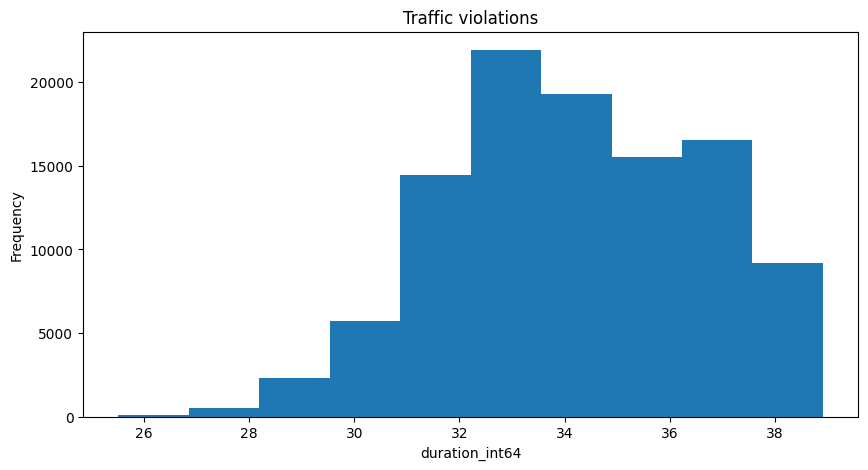

In [215]:
# for i in type_list:
#     combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64'].plot(kind='hist', title=type_mapper[i], figsize=(10, 5), xlabel='duration_int64')
#     # print(i)
#     break

for i in type_mapper.values():
    combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'].plot(kind='hist', title=i, figsize=(10, 5), xlabel='duration_int64')
    # print(i)
    break

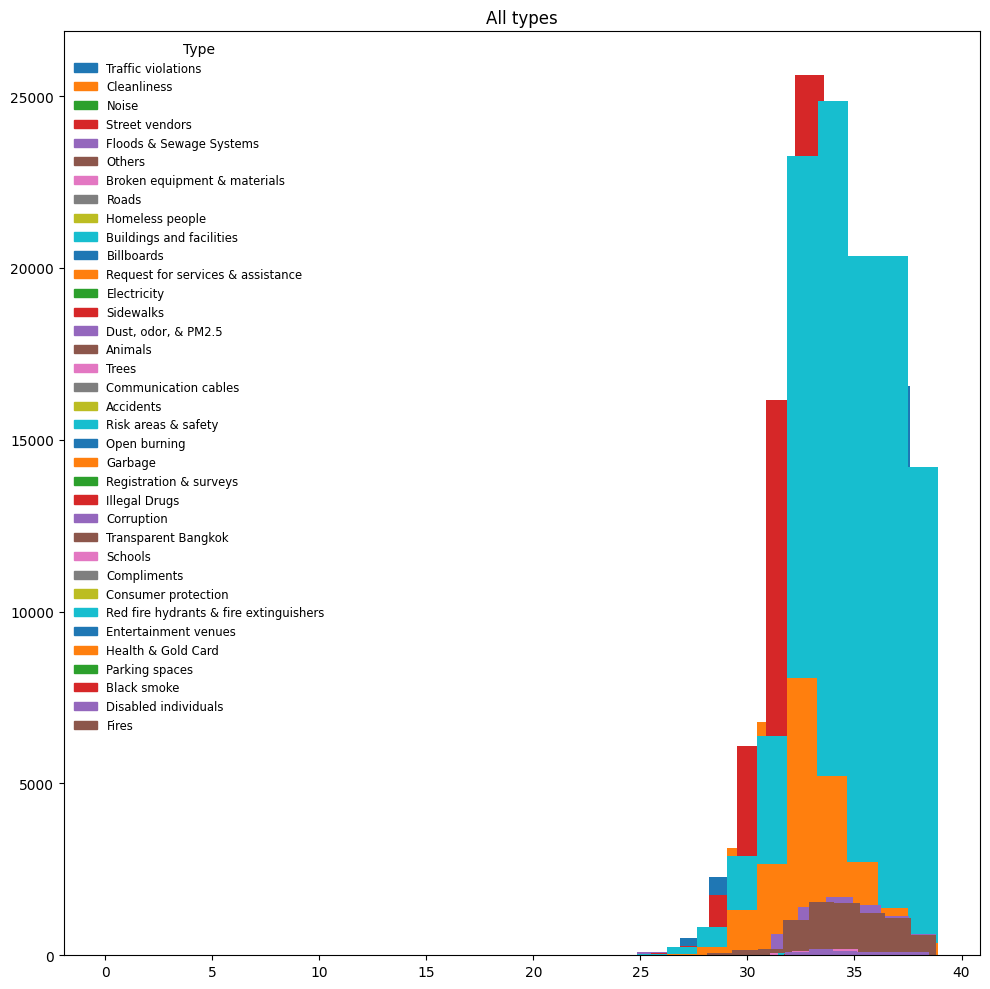

In [216]:
# for i in type_list:
#     fig = combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale'].plot(kind='hist', figsize=(8, 8), xlabel='duration_int64_logscale')
#     # print(i)
#     # break
# fig.set_title('All types')
# plt.show()

import matplotlib.patches as mpatches

plt.figure(figsize=(10, 10))
legend_handles = []
# for i in type_mapper.values():
#     fig = combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'].plot(kind='hist', figsize=(8, 8), xlabel='duration_int64_logscale')
    
for i in type_mapper.values():
    # Plot the histogram
    # n, bins, patches = plt.hist(
    #     combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'], 
    #     bins=30, alpha=0.5, label=i
    # )
    n, bins, patches = plt.hist(
        combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'], 
        label=i
    )
    legend_handles.append(mpatches.Patch(color=patches[0].get_facecolor(), label=i))
    # print(i)
    # break
    
# fig.set_title('All types')
plt.title('All types')
plt.legend(handles=legend_handles, title="Type", loc="upper left", fontsize="small", frameon=False)
plt.tight_layout()
plt.show()

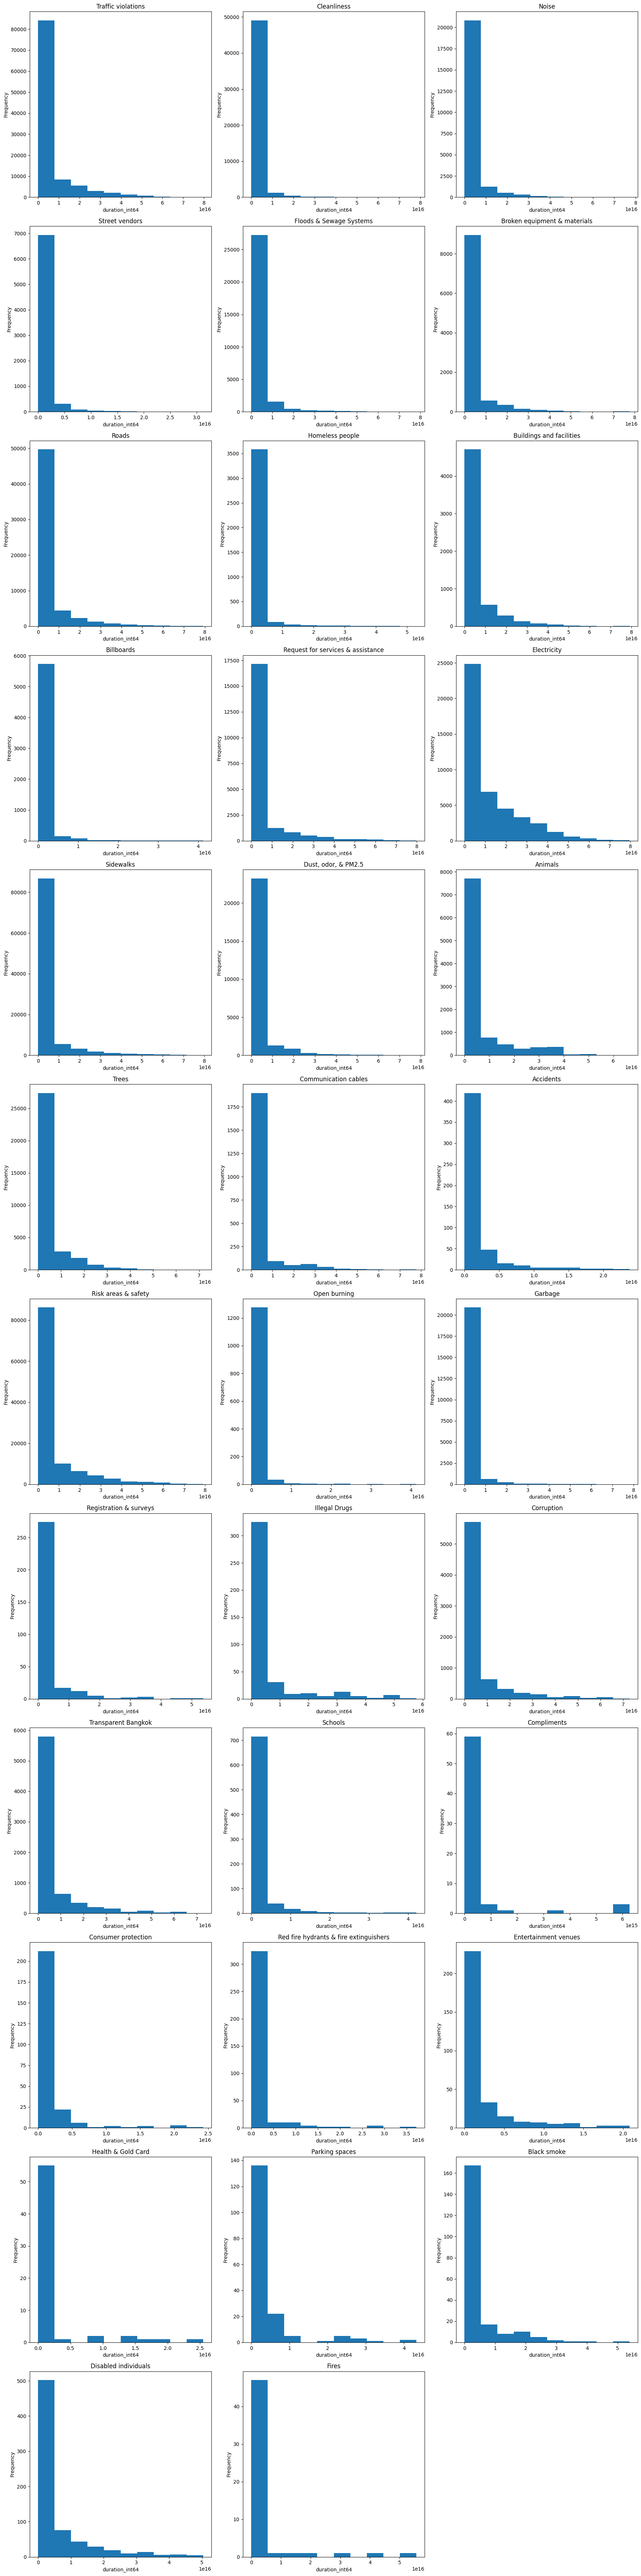

In [219]:
figures_per_row = 3 # Number of figures per row
num_figures = len(type_list)
num_rows = (num_figures + figures_per_row - 1) // figures_per_row  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, figures_per_row, figsize=(figures_per_row * 6, num_rows * 6))
axes = axes.flatten()  # Flatten axes array to make it easier to index

# Plot each figure
for idx, i in enumerate(type_list):
    ax = axes[idx]
    data = combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == type_mapper[i]]['duration_int64']
    data.plot(kind='hist', ax=ax, title=type_mapper[i], xlabel='duration_int64')

# Hide any unused subplots
for idx in range(num_figures, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

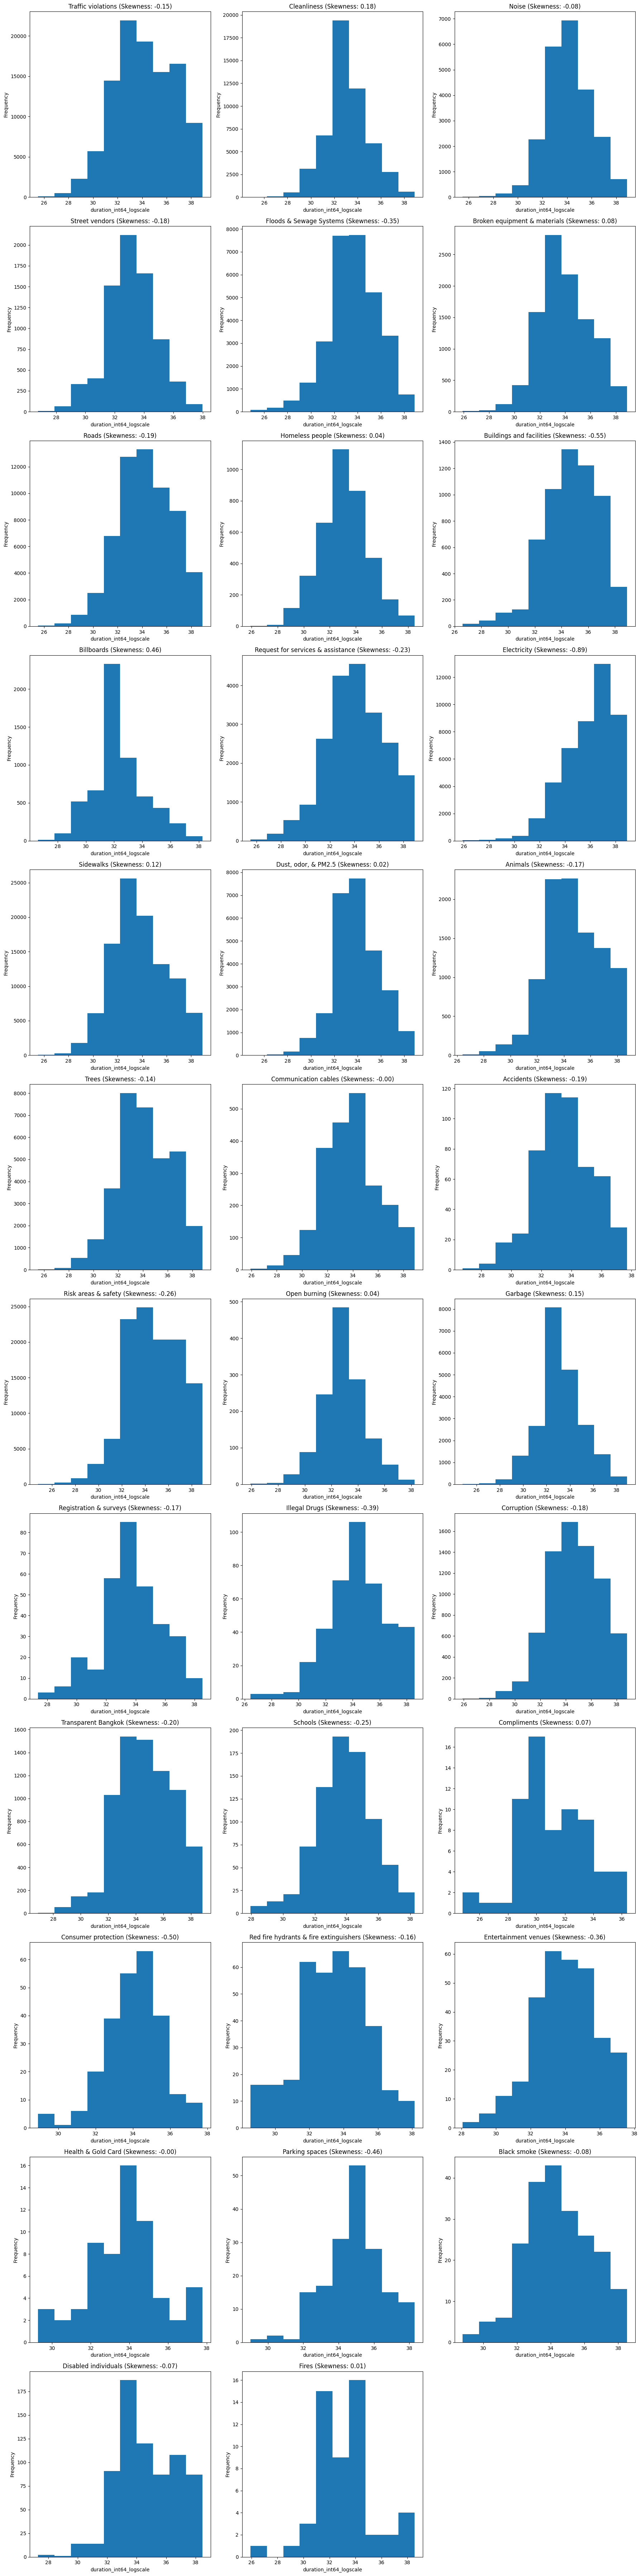

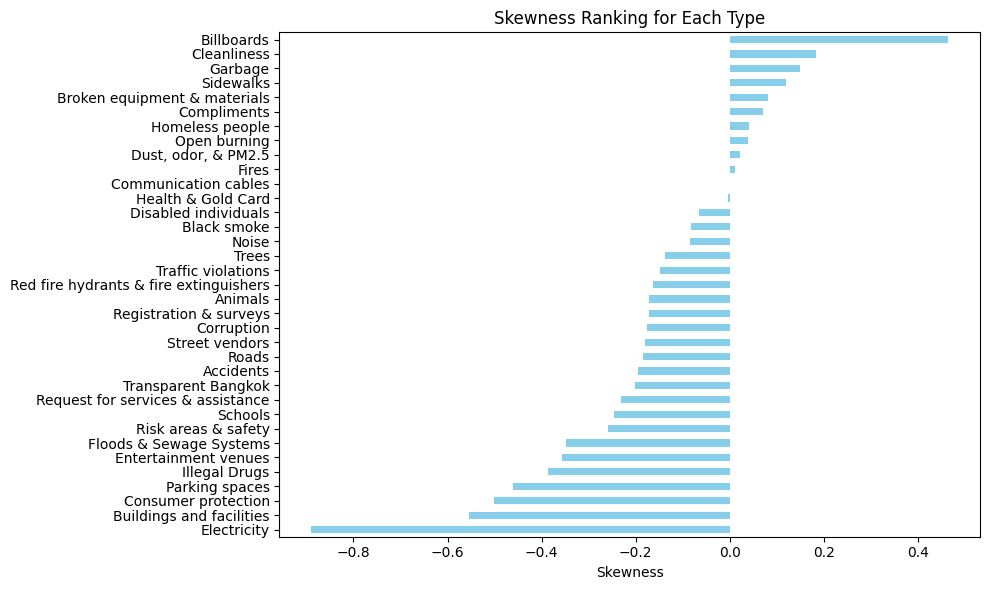

In [222]:
import matplotlib.pyplot as plt
import pandas as pd

# ----- Part 1: Plot Histograms with Skewness in Titles -----

figures_per_row = 3  # Number of figures per row
num_figures = len(type_list)
num_rows = (num_figures + figures_per_row - 1) // figures_per_row  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, figures_per_row, figsize=(figures_per_row * 6, num_rows * 6))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Dictionary to store skewness for each type
skew_dict = {}

# Plot each figure and compute skewness
for idx, i in enumerate(type_list):
    ax = axes[idx]
    # Filter data for the specific type
    data = combined_exploded_averages_df_bkk_categorized[
        combined_exploded_averages_df_bkk_categorized['type_eng'] == type_mapper[i]
    ]['duration_int64_logscale']
    
    # Calculate skewness
    skewness_value = data.skew()
    skew_dict[type_mapper[i]] = skewness_value  # Store for later ranking chart
    
    # Plot histogram
    data.plot(kind='hist', ax=ax, xlabel='duration_int64_logscale')
    
    # Set the title including skewness (formatted to 2 decimal places)
    ax.set_title(f"{type_mapper[i]} (Skewness: {skewness_value:.2f})")

# Hide any unused subplots if there are extra axes
for idx in range(num_figures, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# ----- Part 2: Create a Ranking Chart for Skewness -----

# Convert the skewness dictionary into a Pandas Series and sort it
skew_series = pd.Series(skew_dict).sort_values()

plt.figure(figsize=(10, 6))
skew_series.plot(kind='barh', color='skyblue')
plt.xlabel('Skewness')
plt.title('Skewness Ranking for Each Type')
plt.tight_layout()
plt.show()


From the visualisation, it can been seen that the distribution of each type has been normalized using logscale.

The Skewness of the distribution of each type is shown in the bar chart.
<br> Positive skewness indicates that although the bulk of cases are resolved quickly, there are some cases that take much longer.
<br> Negative skewness suggests that most cases take longer, with only a few cases solved very quickly.

Also, we can use the outlier detection method to find the outliers of each type, which would indicate the cases that take too long.

**Hence, finding the cases (problems) that take too long can be separated in 2 ways:**


1) Skewness of the distribution
* Positive skewness: Why are some cases take much longer to solve than the majority in the type?
* Negative skewness: If it is possible to solve some cases so quickly, why do most cases in the type take so long to solve?

    <br> So, from the bar chart, the types to be further analyzed are:
* Positively skewed: Billboards
* Negatively skewed: Electrivity, Building and facilities, Consumer protection, Parking spaces, and Illegal Drugs

2) Outlier detection (For outliers of every type)

### Thus, the question 'Which problems can be solved quickly?' has now been answered. That is, the types with excessive skewness, and the outlier cases of every type.

# Pinpointing the reason

In [246]:
combined_exploded_averages_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Plot.csv')

In [228]:
combined_exploded_averages_df_bkk_categorized['type'].unique()

array(['ผิดกฎจราจร', 'ความสะอาด', 'เสียง', 'หาบเร่แผงลอย',
       'อุทกภัย&การประปา', 'อุปกรณ์&วัสดุชำรุด', 'ถนน', 'คนเร่ร่อน',
       'อาคารสถานที่', 'ป้ายโฆษณา', 'ขอใช้บริการ&ขอความช่วยเหลือ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'สัตว์', 'ต้นไม้',
       'สายสื่อสาร', 'อุบัติเหตุ', 'จุดเสี่ยง&ความปลอดภัย',
       'เผาในที่โล่ง', 'ขยะ', 'ขึ้นทะเบียน&สำรวจ', 'ยาเสพติด', 'ทุจริต',
       'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม', 'คุ้มครองผู้บริโภค',
       'ประปาหัวแดง&ถังดับเพลิง', 'สถานบันเทิง', 'สุขภาพ&บัตรทอง',
       'ที่จอดรถ', 'ควันดำ', 'ผู้พิการ', 'อัคคีภัย'], dtype=object)

In [247]:
#​ Since 'ชื่นชม' isn't a problem to be solved, this type will be dropped.
combined_exploded_averages_df_bkk_categorized = combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type']!= 'ชื่นชม']

In [232]:
combined_exploded_averages_df_bkk_categorized.columns

Index(['ticket_id', 'type', 'organization_action', 'comment', 'coords',
       'address', 'subdistrict', 'district', 'province', 'state', 'star',
       'count_reopen', 'last_activity', 'view_count', 'timestamp_reported',
       'timestamp_finish', 'duration', 'duration_int64',
       'duration_int64_logscale', 'duration_mean_int64',
       'duration_mean_timedelta64[ns]', 'duration_mean_int64_logscale',
       'duration_mean_int64_logscale_expback',
       'duration_mean_timedelta64[ns]_logscale_expback',
       'duration_median_int64', 'duration_median_timedelta64[ns]',
       'duration_mode_int64', 'duration_mode_timedelta64[ns]', 'count'],
      dtype='object')

### 1) Skewness of Distribution

#### Positively Skewed

##### 1) Billboard

### 2) Outlier Detection

/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_81081/912428341.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=counts, ax=axs[0], palette="viridis")
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_81081/912428341.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels, rotation=45, ha='right')
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_81081/912428341.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=percents, ax=axs[1], palette="magma")
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_81081/912428341.p

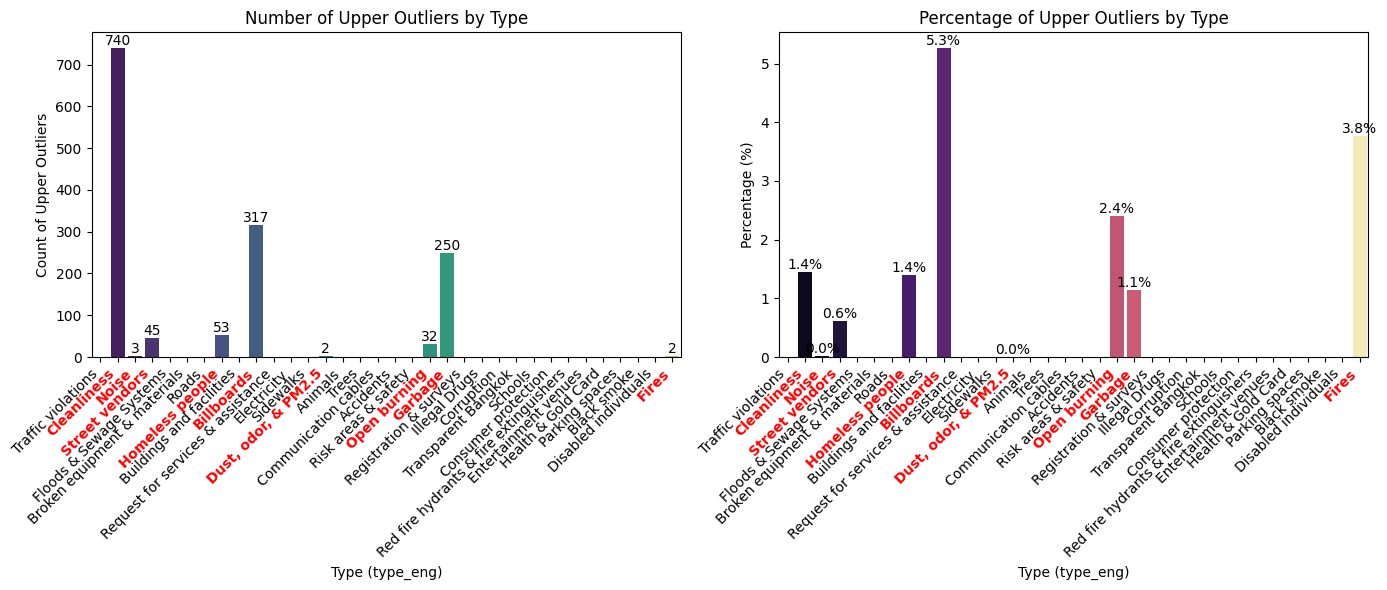

Types with nonzero upper outliers: ['ความสะอาด', 'เสียง', 'หาบเร่แผงลอย', 'คนเร่ร่อน', 'ป้ายโฆษณา', 'ฝุ่นควัน&กลิ่น&PM2.5', 'เผาในที่โล่ง', 'ขยะ', 'อัคคีภัย']
Corresponding labels: ['Cleanliness', 'Noise', 'Street vendors', 'Homeless people', 'Billboards', 'Dust, odor, & PM2.5', 'Open burning', 'Garbage', 'Fires']


In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionaries to store the counts and percentages for each type
outlier_counts = {}
total_counts = {}
percentages = {}

# Loop through each unique type in the 'type' column
for t in combined_exploded_averages_df_bkk_categorized['type'].unique():
    # Filter the data for the current type
    data_type = combined_exploded_averages_df_bkk_categorized[
        combined_exploded_averages_df_bkk_categorized['type'] == t
    ]['duration_int64_logscale']
    
    total_counts[t] = len(data_type)
    
    # Calculate Q1, Q3, and IQR for this type's duration
    Q1 = data_type.quantile(0.25)
    Q3 = data_type.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper bound using the IQR method
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the upper outliers and count them
    outliers_upper = data_type[data_type > upper_bound]
    count_outliers = len(outliers_upper)
    outlier_counts[t] = count_outliers
    
    # Calculate the percentage of upper outliers in the type
    percentages[t] = (count_outliers / total_counts[t]) * 100 if total_counts[t] > 0 else 0

# Prepare lists for plotting. Use the keys from the dictionary as the group.
types = list(outlier_counts.keys())
# Use type_mapper to create a label list for each type (assumes type_mapper is defined)
labels = [type_mapper[t] for t in types]

counts = [outlier_counts[t] for t in types]
percents = [percentages[t] for t in types]

# Create a list of types that have a nonzero outlier count for later use.
types_with_outliers = [t for t, count in outlier_counts.items() if count > 0]
# Optionally, get the corresponding English labels
labels_with_outliers = [type_mapper[t] for t in types_with_outliers]

# Create two subplots: one for counts and one for percentages
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar chart for number of upper outliers per type ---
sns.barplot(x=types, y=counts, ax=axs[0], palette="viridis")
axs[0].set_title("Number of Upper Outliers by Type")
axs[0].set_xlabel("Type (type_eng)")
axs[0].set_ylabel("Count of Upper Outliers")
# Set custom x tick labels using the type_eng mapping
axs[0].set_xticklabels(labels, rotation=45, ha='right')
# Annotate bars with counts (if nonzero)
for i, count in enumerate(counts):
    if count != 0:
        axs[0].text(i, count, str(count), color='black', ha="center", va='bottom')
# Highlight x-axis labels with nonzero values
for i, label in enumerate(axs[0].get_xticklabels()):
    if counts[i] > 0:
        label.set_color('red')
        label.set_fontweight('bold')

# --- Bar chart for percentage of upper outliers per type ---
sns.barplot(x=types, y=percents, ax=axs[1], palette="magma")
axs[1].set_title("Percentage of Upper Outliers by Type")
axs[1].set_xlabel("Type (type_eng)")
axs[1].set_ylabel("Percentage (%)")
axs[1].set_xticklabels(labels, rotation=45, ha='right')
# Annotate bars with percentages (if nonzero)
for i, percent in enumerate(percents):
    if percent != 0:
        axs[1].text(i, percent, f"{percent:.1f}%", color='black', ha="center", va='bottom')
# Highlight x-axis labels with nonzero values
for i, label in enumerate(axs[1].get_xticklabels()):
    if percents[i] > 0:
        label.set_color('red')
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print or return the list of types with nonzero outlier count for later use
print("Types with nonzero upper outliers:", types_with_outliers)
print("Corresponding labels:", labels_with_outliers)

In [268]:
combined_exploded_averages_df_bkk_categorized.loc[:, 'organization_action_len'] = combined_exploded_averages_df_bkk_categorized.loc[:, 'organization_action'].apply(len)

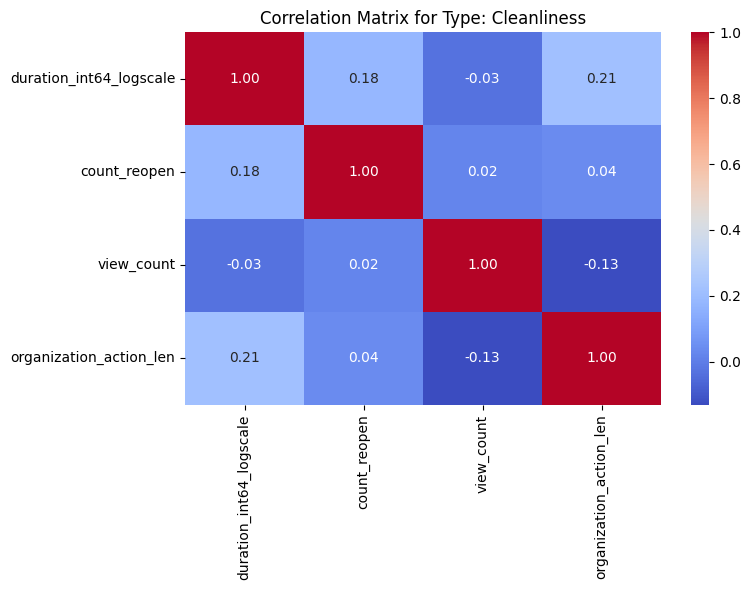

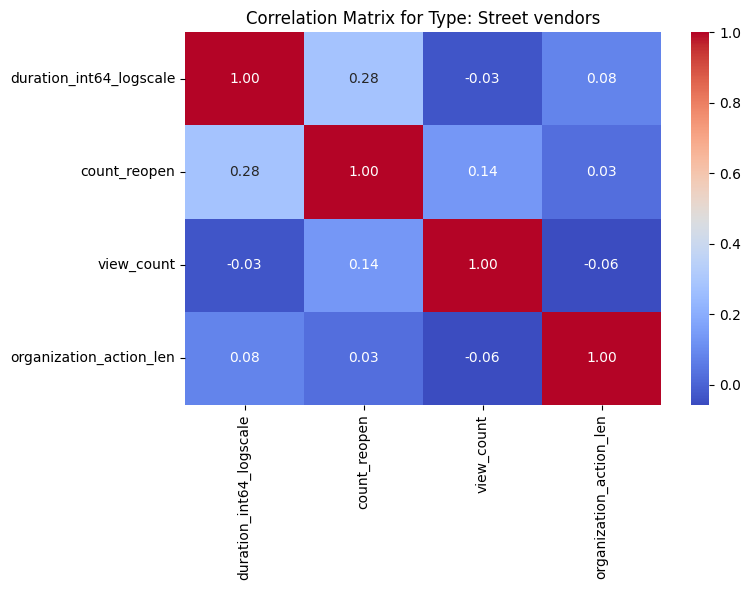

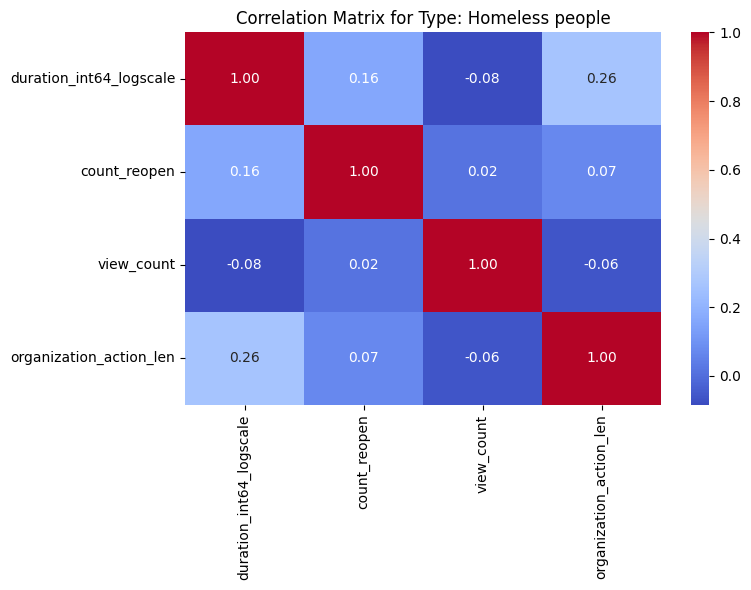

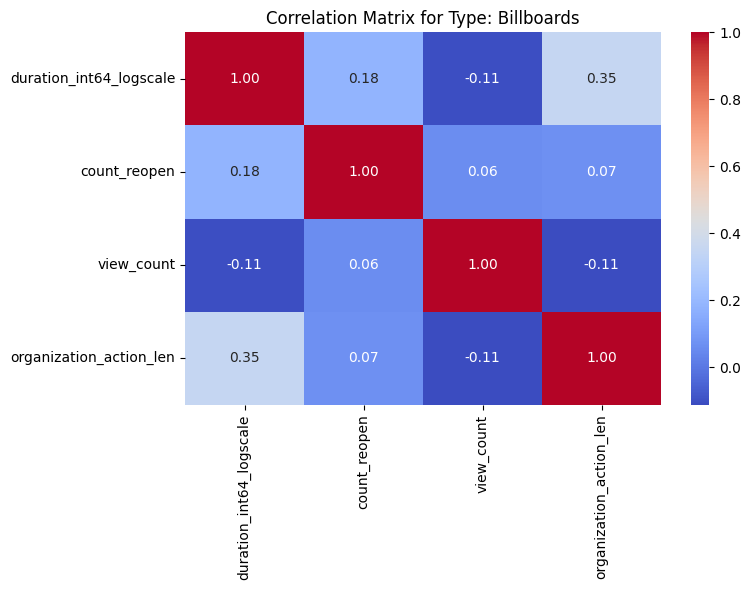

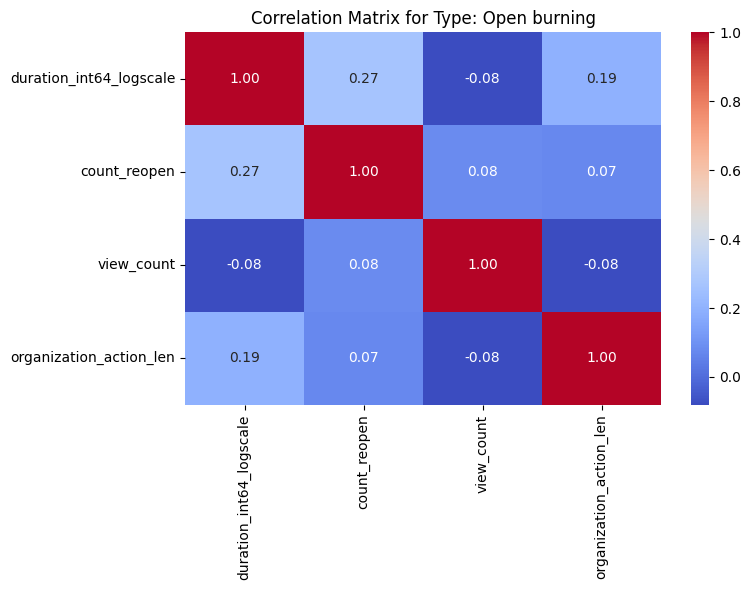

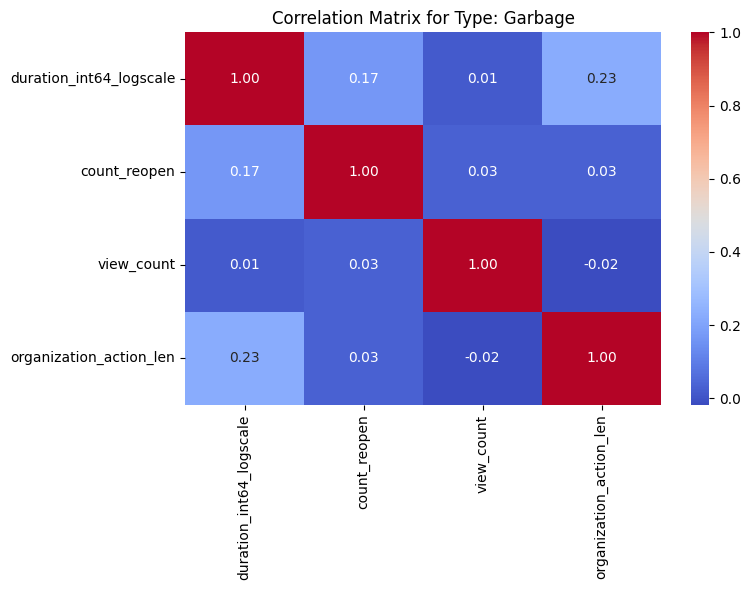

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you're interested in for correlation analysis.
# Adjust this list based on the numeric features you want to examine.
cols_to_check = [
    'duration_int64_logscale',    # Log-transformed duration
    'count_reopen',               # Number of times a ticket was reopened
    'view_count',                 # Number of views
    'organization_action_len'
]

# Loop over each type and create a correlation heatmap.
too_few = ['เสียง', 'ฝุ่นควัน&กลิ่น&PM2.5', 'อัคคีภัย']

for t in [x for x in types_with_outliers if x not in too_few]:
    # Filter the DataFrame for the current type.
    type_data = combined_exploded_averages_df_bkk_categorized[
        combined_exploded_averages_df_bkk_categorized['type'] == t
    ]
    
    # Compute the correlation matrix for the selected columns.
    corr_matrix = type_data[cols_to_check].corr()
    
    # Create the heatmap.
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    
    # Use the type_mapper to get a descriptive label (type_eng) for the title.
    plt.title(f"Correlation Matrix for Type: {type_mapper[t]}")
    plt.tight_layout()
    plt.show()


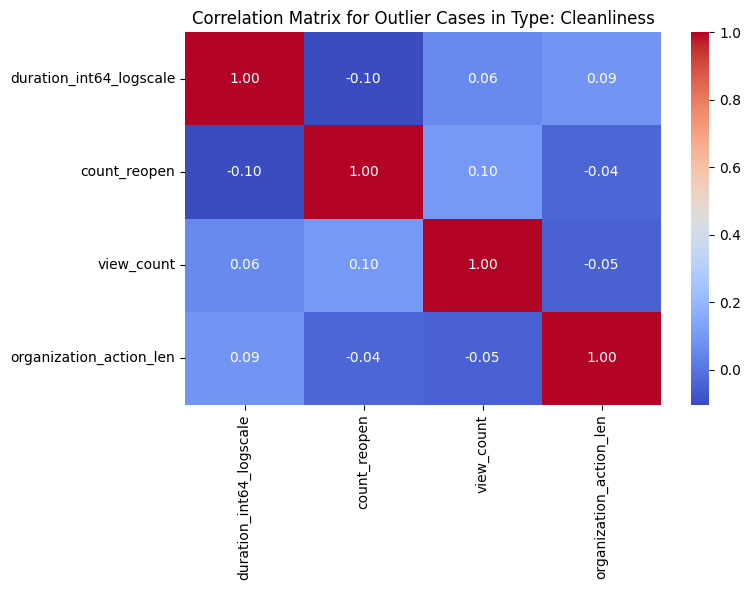

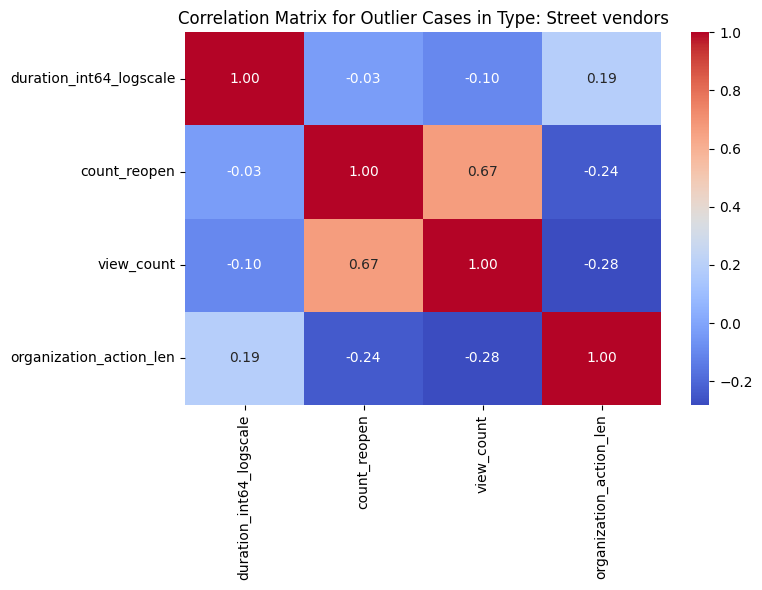

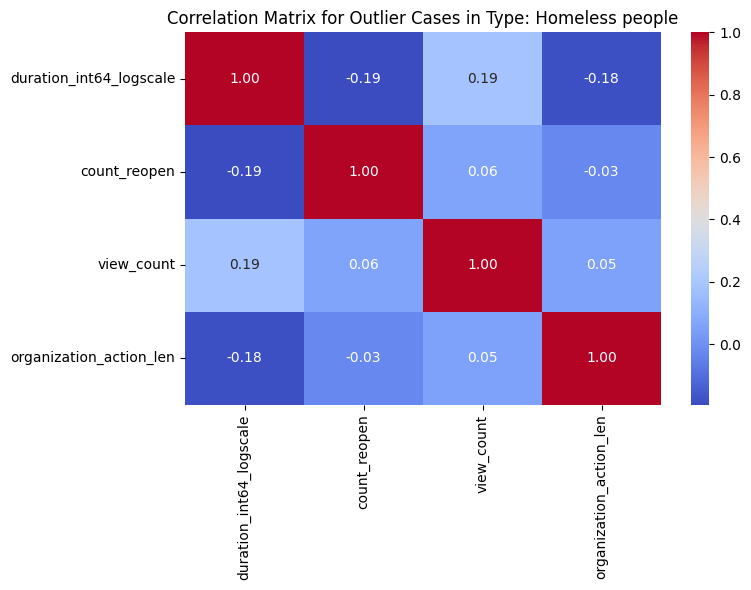

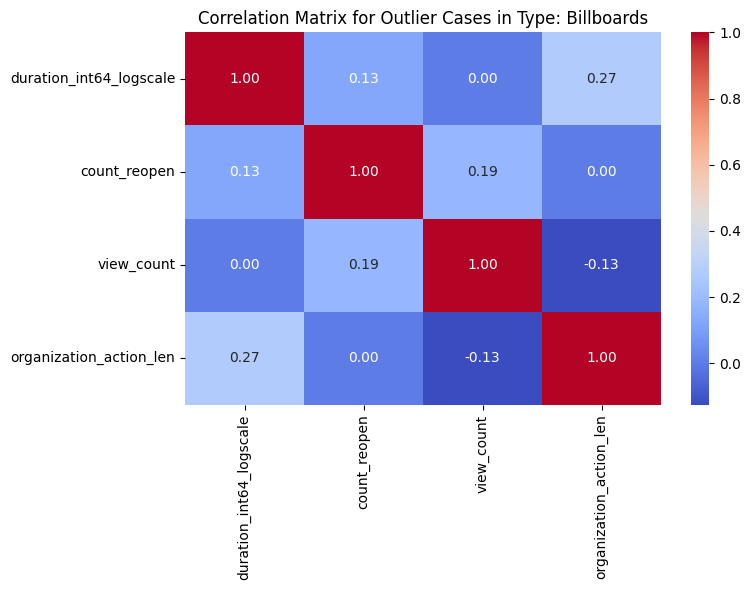

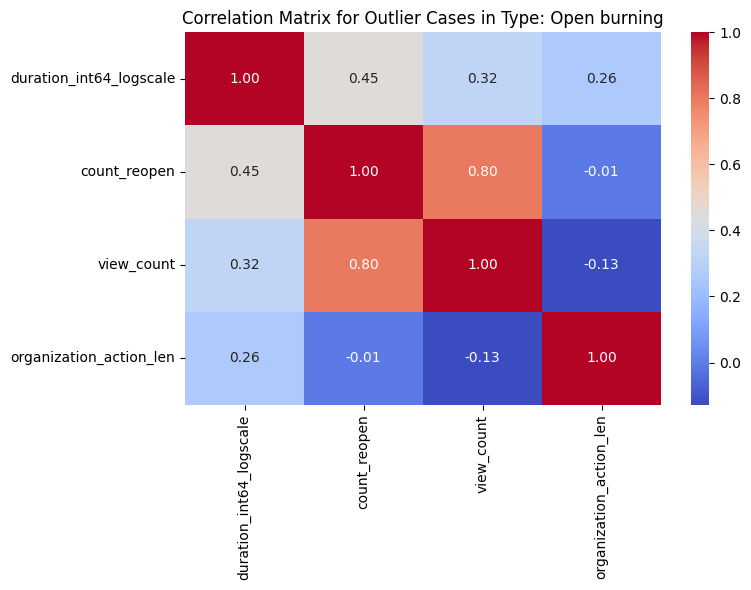

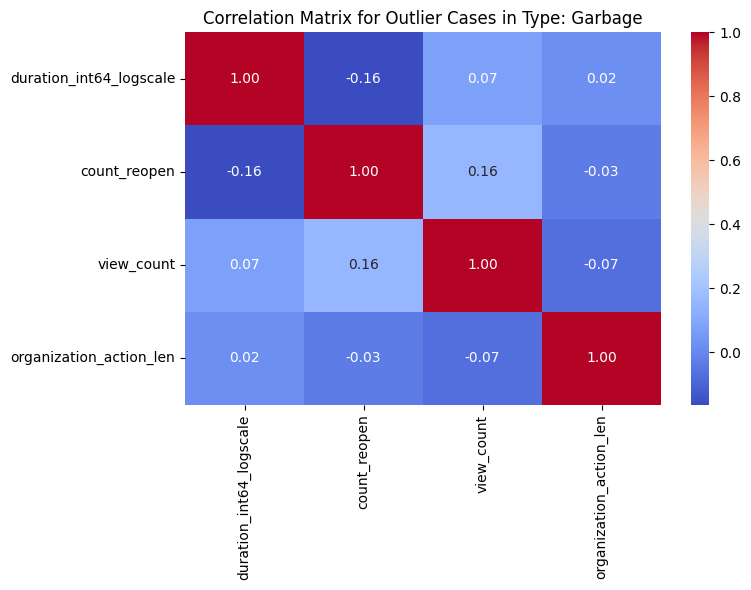

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you're interested in for correlation analysis.
cols_to_check = [
    'duration_int64_logscale',    # Log-transformed duration
    'count_reopen',               # Number of times a ticket was reopened
    'view_count',                 # Number of views
    'organization_action_len'
]

# Define the types to exclude.
too_few = ['เสียง', 'ฝุ่นควัน&กลิ่น&PM2.5', 'อัคคีภัย']

# Loop over each type (that has outliers and is not in 'too_few')
for t in [x for x in types_with_outliers if x not in too_few]:
    # Filter the DataFrame for the current type.
    type_data = combined_exploded_averages_df_bkk_categorized[
        combined_exploded_averages_df_bkk_categorized['type'] == t
    ]
    
    # Compute Q1, Q3, and IQR for the duration for this type.
    data_duration = type_data['duration_int64_logscale']
    Q1 = data_duration.quantile(0.25)
    Q3 = data_duration.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter only the outlier cases (duration greater than the upper bound)
    outlier_data = type_data[data_duration > upper_bound]
    
    # If no outlier cases, skip this type.
    if outlier_data.empty:
        continue

    # Compute the correlation matrix for the selected columns on the outlier data.
    corr_matrix = outlier_data[cols_to_check].corr()
    
    # Create the heatmap for the outlier cases.
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    
    # Use type_mapper to get a descriptive label (type_eng) for the title.
    plt.title(f"Correlation Matrix for Outlier Cases in Type: {type_mapper[t]}")
    plt.tight_layout()
    plt.show()


### ML???